# Task B
![](taskB.png)

# Task A

## 4.
![](4a.png) ![](4b.png)
In those two examples from test set (first and fourth record) there are two different variables of the highest importance. In the first it is `caa_0` (variable `caa` after one hot encoding). In the second example it is the `thall`.

Same goes for second most important variable - `exeng` for the first one and `cp_0` for the second one.

## 5.
![](5a.png) ![](5b.png)
Here I'm looking into the second and the sixth observations. The variable `thall` has negative impact in the first observation and positive in the second one.

## 6.
![](6a.png) ![](6a2.png)
![](6b.png) ![](6b2.png)
As we can see, the results from both methods in the first glance are quite similar. They have of course the same result (prediction). I display them here in the same order, so it's easier to compare them.

In both examples all displayed variables have the same sigh of attribution (a variable is positive on both methods or negative on both).
However, the values of attribution differ. This is not surprising, those two methods work differently.
What is strange is that the intercept (mean prediction of the model) is also different. Those models were trained on the same data, so they must also have a different way of measuring the intercept.

## 7.
![](7a.png) ![](7b.png)
Here we can see the comparison between the Random Forest Classifier model and the Logistic Regression model.
The second model outputs are before the sigmoid function, so they have different magnitude.
The importance of different variables is slighly different. However, the sigs of those importance are the same between the models.


# Appendix

## 1.
Here the data is loaded (same as in previous homework) and a simple model is trained and evaluated. It is Random Forest Classifier from sklearn with default parameters.

Loading and preparing the data consists of:
- one hot encoding (models like logistic regression require this)
- splitting between target (y) and x

In [56]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
import shap
import dalex as dx

np.random.seed(42)


def load_data():
    df = pd.read_csv('heart.csv')

    # One hot encoding (for linear classifier)
    df = pd.get_dummies(df, columns=['caa', 'cp', 'restecg'])

    # Get targets
    y_all = df['output'].to_numpy()

    x_all = df.drop(columns=['output'])

    # Split data to train and test
    return train_test_split(x_all, y_all, test_size=0.2, random_state=42)


x_train, x_test, y_train, y_test = load_data()
print(f"{x_train.shape=}", f"{x_test.shape=}", f"{y_train.shape=}", f"{y_test.shape=}")

x_train.shape=(242, 22) x_test.shape=(61, 22) y_train.shape=(242,) y_test.shape=(61,)


In [57]:
def get_model(verbose=False, model=None):
    if model is None:
        model = RandomForestClassifier()
    metrics = {
        "auc": roc_auc_score,
        "accuracy": accuracy_score
    }
    model.fit(x_train, y_train)
    pred_test = model.predict(x_test)
    if verbose:
        print({metric_name: metric_fun(y_test, pred_test) for metric_name, metric_fun in metrics.items()})

    return model

model = get_model(True)
model_linear = get_model(True, LogisticRegression())

{'auc': 0.8841594827586207, 'accuracy': 0.8852459016393442}
{'auc': 0.8685344827586206, 'accuracy': 0.8688524590163934}


## 2.
Here are the model predictions on the first two observations from the test set

In [58]:
model.predict_proba(x_test.iloc[0:2])[:, 1]

array([0.06, 0.61])

## 3.
Here are calculated and plotted the variable attributions of those first two observations. First plot is from shap, second is from dalex.

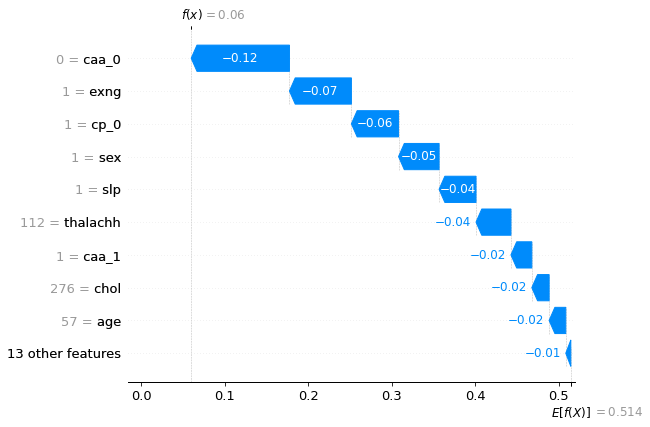

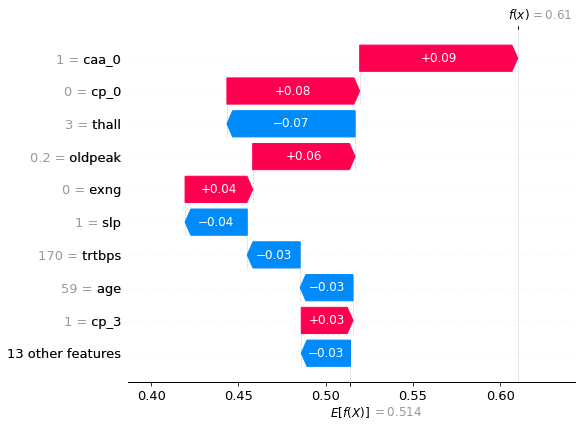

In [59]:
shap_explainer = shap.Explainer(model, x_train)
shap_explainer_linear = shap.Explainer(model_linear, x_train)
dalex_explainer = dx.Explainer(model, x_train, y_train, verbose=False)


def plot_explain(i, method='shap', linear=False):
    df = x_test[i:i+1]

    shap_values = (shap_explainer(df)[0, :, 1] if not linear else shap_explainer_linear(df)[0, :])
    order = np.argsort(-np.abs(shap_values.values))
    if method == 'shap' or method=='both':
        shap.plots.waterfall(shap_values)
    if method == 'dalex' or method=='both':
        dalex_explainer.predict_parts(df.iloc[0], order=order).plot()

plot_explain(0, method='both')
plot_explain(1, method='both')

## 4.

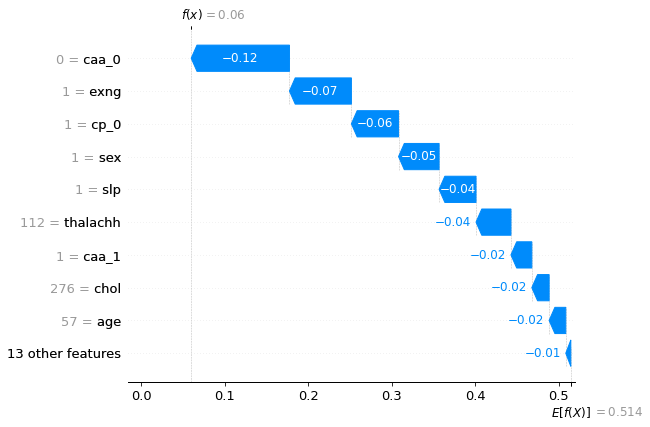

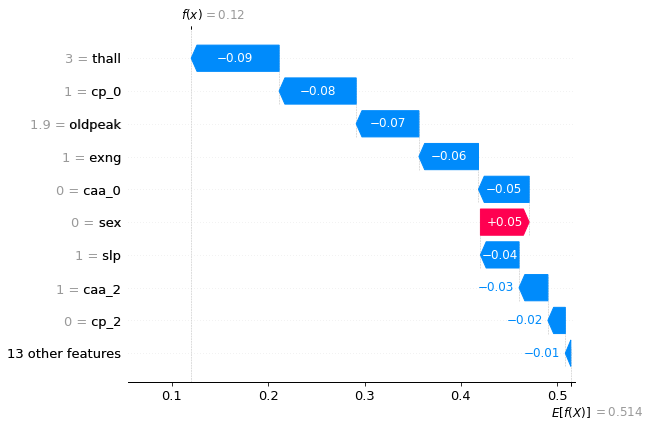

In [60]:
_ = plot_explain(0), plot_explain(3)

## 5.

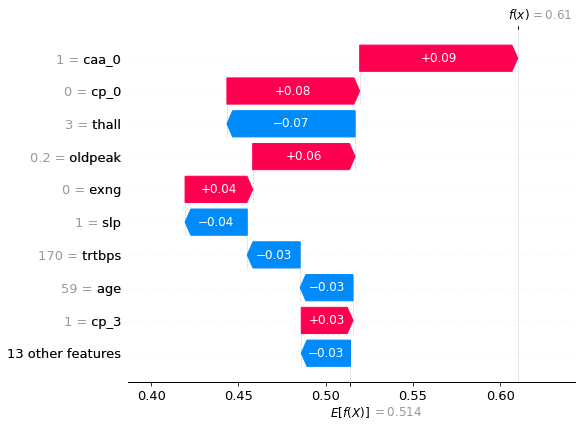

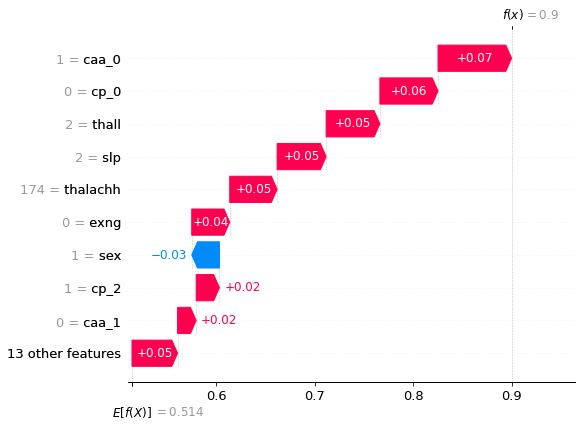

In [61]:
_ = plot_explain(1), plot_explain(5)

## 6.

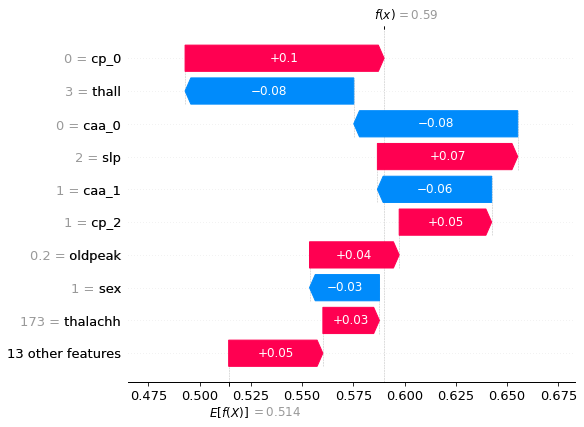

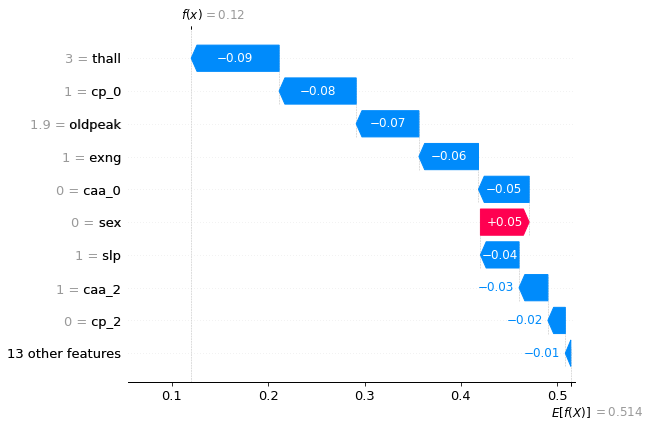

In [62]:
_ = plot_explain(2, method='both'), plot_explain(3, method='both')

## 7.

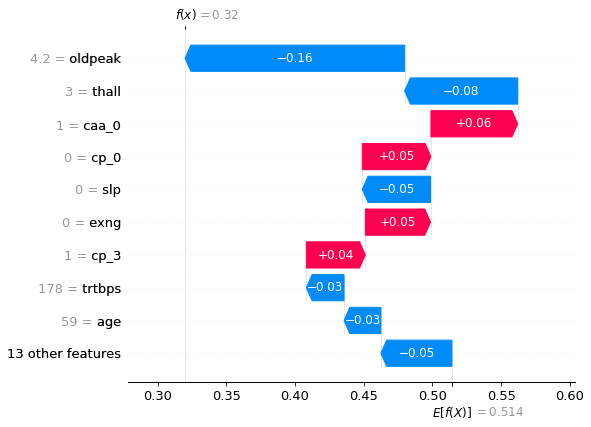

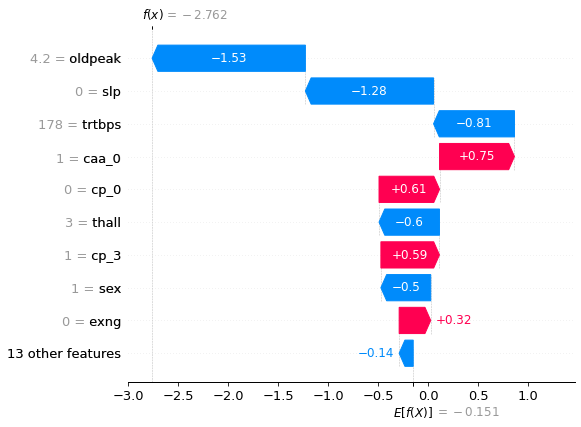

In [63]:
_ = plot_explain(11, method='shap', linear=False), plot_explain(11, method='shap', linear=True)

## 8.

Looking at observations from 4. to 7. we can deduce some conclusions:
 - there are variables of high attribution on all observation, like `cp_0`, `caa_0`, `thall`, `sex`, `age`. Probably a model trained only on those variables would still achieve good performance
 - different models and different methods can give different values of attribution. However, the main conclusion about those attribution stays the same between those experiments. The same variables have high positive attribution, the same variables are not important in particular observation
